In [34]:
import pandas as pd
import yaml as y
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [2]:
# Generate folder and file name related value to access yaml file

months = pd.date_range(start="2023-10-01",end="2024-11-30",periods=14).strftime("%Y-%m")
dates = pd.date_range(start="2023-10-01",end="2024-11-30").strftime("%Y-%m-%d")

In [3]:
# Extracting the data from yaml file and converting it into dataframe

main_df = []
for m in months:
    for i in dates:
        df=None
        if m in i:
            try:
                with open(f"D:\\Kishanth\\Guvi Project\\Data-Driven Stock Analysis\\data\\{m}\\{i}_05-30-00.yaml") as f:
                    data = y.safe_load(f)
                    df = pd.DataFrame(data=data)
                    main_df.append(df)
            except FileNotFoundError:
                print(f"No file exist on this date-{i}")
                continue
dataframe = pd.concat(main_df,ignore_index=True)
dataframe

No file exist on this date-2023-10-01
No file exist on this date-2023-10-02
No file exist on this date-2023-10-07
No file exist on this date-2023-10-08
No file exist on this date-2023-10-14
No file exist on this date-2023-10-15
No file exist on this date-2023-10-21
No file exist on this date-2023-10-22
No file exist on this date-2023-10-24
No file exist on this date-2023-10-28
No file exist on this date-2023-10-29
No file exist on this date-2023-11-04
No file exist on this date-2023-11-05
No file exist on this date-2023-11-11
No file exist on this date-2023-11-14
No file exist on this date-2023-11-18
No file exist on this date-2023-11-19
No file exist on this date-2023-11-25
No file exist on this date-2023-11-26
No file exist on this date-2023-11-27
No file exist on this date-2023-12-02
No file exist on this date-2023-12-03
No file exist on this date-2023-12-09
No file exist on this date-2023-12-10
No file exist on this date-2023-12-16
No file exist on this date-2023-12-17
No file exis

,Ticker,close,date,high,low,month,open,volume
0,SBIN,602.95,2023-10-03 05:30:00,604.9,589.60,2023-10,596.60,15322196
1,BAJFINANCE,7967.60,2023-10-03 05:30:00,7975.5,7755.00,2023-10,7780.80,944555
2,TITAN,3196.25,2023-10-03 05:30:00,3212.5,3114.40,2023-10,3148.80,1007308
3,ITC,439.75,2023-10-03 05:30:00,442.9,439.25,2023-10,441.00,7481883
4,TCS,3513.85,2023-10-03 05:30:00,3534.2,3480.10,2023-10,3534.20,1948148
...,...,...,...,...,...,...,...,...
14195,HINDALCO,652.10,2024-11-22 05:30:00,657.3,647.40,2024-11,652.95,3586402
14196,HEROMOTOCO,4794.10,2024-11-22 05:30:00,4808.4,4742.00,2024-11,4778.40,394712
14197,AXISBANK,1142.40,2024-11-22 05:30:00,1147.9,1127.55,2024-11,1136.65,16687505
14198,HDFCBANK,1745.60,2024-11-22 05:30:00,1754.3,1729.55,2024-11,1743.55,12386806


--------------------------------------------------------------------------------------------------------------

# Data Cleaning and Transformation

In [4]:
dataframe.shape

(14200, 8)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  14200 non-null  object 
 1   close   14200 non-null  float64
 2   date    14200 non-null  object 
 3   high    14200 non-null  float64
 4   low     14200 non-null  float64
 5   month   14200 non-null  object 
 6   open    14200 non-null  float64
 7   volume  14200 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 887.6+ KB


In [6]:
# Applying transformation as per requirements

# we can extract the month from date column itself
dataframe = (dataframe.drop(["month"],axis=1))

dataframe["Ticker"] = dataframe["Ticker"].astype(str)

dataframe["date"] = pd.to_datetime(dataframe.date).dt.strftime("%Y-%m-%d")

dataframe

,Ticker,close,date,high,low,open,volume
0,SBIN,602.95,2023-10-03,604.9,589.60,596.60,15322196
1,BAJFINANCE,7967.60,2023-10-03,7975.5,7755.00,7780.80,944555
2,TITAN,3196.25,2023-10-03,3212.5,3114.40,3148.80,1007308
3,ITC,439.75,2023-10-03,442.9,439.25,441.00,7481883
4,TCS,3513.85,2023-10-03,3534.2,3480.10,3534.20,1948148
...,...,...,...,...,...,...,...
14195,HINDALCO,652.10,2024-11-22,657.3,647.40,652.95,3586402
14196,HEROMOTOCO,4794.10,2024-11-22,4808.4,4742.00,4778.40,394712
14197,AXISBANK,1142.40,2024-11-22,1147.9,1127.55,1136.65,16687505
14198,HDFCBANK,1745.60,2024-11-22,1754.3,1729.55,1743.55,12386806


In [7]:
# Generate the csv file from dataframe

#dataframe.to_csv(f"D:\\Kishanth\\Guvi Project\\Data-Driven Stock Analysis\\data\\Final_Extracted_data\\overall_data.csv",index=False)

# Generating the CSV file for each stocks

symbol = dataframe["Ticker"].unique()
symbol

for i in symbol:
    df = dataframe[dataframe["Ticker"]==i]
    #df.to_csv(f"D:\\Kishanth\\Guvi Project\\Data-Driven Stock Analysis\\data\\Final_Extracted_data\\{i}.csv",index=False)

--------------------------------------------------------------------------------------------------------------

# Data Analysis and Visualization Requirements:

In [8]:
# Making a second copy of DataFrame

df = dataframe.copy()
df

,Ticker,close,date,high,low,open,volume
0,SBIN,602.95,2023-10-03,604.9,589.60,596.60,15322196
1,BAJFINANCE,7967.60,2023-10-03,7975.5,7755.00,7780.80,944555
2,TITAN,3196.25,2023-10-03,3212.5,3114.40,3148.80,1007308
3,ITC,439.75,2023-10-03,442.9,439.25,441.00,7481883
4,TCS,3513.85,2023-10-03,3534.2,3480.10,3534.20,1948148
...,...,...,...,...,...,...,...
14195,HINDALCO,652.10,2024-11-22,657.3,647.40,652.95,3586402
14196,HEROMOTOCO,4794.10,2024-11-22,4808.4,4742.00,4778.40,394712
14197,AXISBANK,1142.40,2024-11-22,1147.9,1127.55,1136.65,16687505
14198,HDFCBANK,1745.60,2024-11-22,1754.3,1729.55,1743.55,12386806


### Calculate yearly-return

In [9]:
# Group by each stock and calculate yearly return

yearly_returns = (
    df.sort_values(by="date")  # Sort data by date
    .groupby("Ticker")  # Group by stock name (assumed column is named Ticker)
    .apply(lambda group: pd.Series(
        {
        "yearly_return": ((group.iloc[-1]["close"] - group.iloc[0]["open"]) / group.iloc[0]["open"]) * 100
        }
                                  )
          )
    .reset_index()  # Reset index to convert the groupby object back to a DataFrame
)
yearly_returns

C:\Users\suren\AppData\Local\Temp\ipykernel_17572\1461043801.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: pd.Series(


,Ticker,yearly_return
0,ADANIENT,-7.857734
1,ADANIPORTS,37.621065
2,APOLLOHOSP,34.951692
3,ASIANPAINT,-21.916553
4,AXISBANK,10.376812
5,BAJAJ-AUTO,87.199408
6,BAJAJFINSV,4.613625
7,BAJFINANCE,-14.096879
8,BEL,103.662074
9,BHARTIARTL,70.901171


In [111]:
yearly_returns.to_csv(f"D:\\Kishanth\\Guvi Project\\Data-Driven Stock Analysis\\data\\yearly_returns.csv",index=False)

### Top 10 Green Stocks (Highest Returns)

In [10]:
# Top 10 Green Stocks (Highest Returns)

top_10_green_stocks = yearly_returns.sort_values(by="yearly_return", ascending=False).reset_index(drop=True).head(10)
print("Top 10 Green Stocks:\n")
top_10_green_stocks

Top 10 Green Stocks:



,Ticker,yearly_return
0,TRENT,220.725064
1,BEL,103.662074
2,M&M,88.639494
3,BAJAJ-AUTO,87.199408
4,BHARTIARTL,70.901171
5,POWERGRID,69.534591
6,BPCL,64.045911
7,HEROMOTOCO,56.772400
8,SUNPHARMA,54.827304
9,HCLTECH,54.028398


### Top 10 Loss Stocks (Lowest Returns)

In [11]:
# Top 10 Loss Stocks (Lowest Returns)

top_10_red_stocks = yearly_returns.sort_values(by="yearly_return", ascending=True).reset_index(drop=True).head(10)
print("Top 10 Loss Stocks:\n")
top_10_red_stocks

Top 10 Loss Stocks:



,Ticker,yearly_return
0,INDUSINDBK,-30.293296
1,ASIANPAINT,-21.916553
2,BAJFINANCE,-14.096879
3,ADANIENT,-7.857734
4,HINDUNILVR,-1.797189
5,NESTLEIND,-0.150620
6,KOTAKBANK,1.817919
7,MARUTI,3.303516
8,BAJAJFINSV,4.613625
9,TITAN,5.078125


In [12]:
# Filtering green stocks

green_stocks = yearly_returns[yearly_returns["yearly_return"]>0][["Ticker"]].count().iloc[0]
red_stocks =  yearly_returns[yearly_returns["yearly_return"]<0][["Ticker"]].count().iloc[0]

# DataFrame of Green and Red Stocks

green_vs_red = pd.DataFrame(
    {
        "Status":["Green","Red"],
        "Count":[green_stocks,red_stocks]
    }
)
green_vs_red

,Status,Count
0,Green,44
1,Red,6


### Calculate the Average Price across all stocks

In [13]:
# Calculate the average price across all stocks

# creating price for stocks
df["price"] = (df["high"]+df["low"])/2

# getting average price for each stocks
avg_stock_price = df.groupby("Ticker")["price"].mean().reset_index().round(2)
print("The average price of individual stocks:\n")
print(avg_stock_price)

# overall average price of stocks
average_price = df["price"].mean().round(2)
print(f"\nThe average price of stocks are {average_price}")

The average price of individual stocks:

        Ticker     price
0     ADANIENT   2956.53
1   ADANIPORTS   1260.89
2   APOLLOHOSP   6189.69
3   ASIANPAINT   3019.93
4     AXISBANK   1126.49
5   BAJAJ-AUTO   8581.10
6   BAJAJFINSV   1653.93
7   BAJFINANCE   7094.37
8          BEL    233.46
9   BHARTIARTL   1292.83
10        BPCL    285.68
11   BRITANNIA   5251.19
12       CIPLA   1430.33
13   COALINDIA    435.65
14     DRREDDY   1232.25
15   EICHERMOT   4320.73
16      GRASIM   2354.17
17     HCLTECH   1541.39
18    HDFCBANK   1577.98
19    HDFCLIFE    642.35
20  HEROMOTOCO   4689.04
21    HINDALCO    609.29
22  HINDUNILVR   2533.76
23   ICICIBANK   1109.81
24  INDUSINDBK   1443.37
25        INFY   1629.83
26         ITC    454.92
27    JSWSTEEL    874.21
28   KOTAKBANK   1772.81
29          LT   3482.95
30         M&M   2250.28
31      MARUTI  11629.98
32   NESTLEIND   2491.14
33        NTPC    346.42
34        ONGC    260.33
35   POWERGRID    286.87
36    RELIANCE   1388.58
37     SB

### Calculate the Average Volume across all stock

In [14]:
# Calculate the average Volume across all stocks.

# getting average volume for each stocks
avg_stock_volume = df.groupby("Ticker")["volume"].mean().reset_index().round(2)
print("The average volume of individual stocks:\n")
print(avg_stock_volume)

# overall average price of stocks
average_volume = df["volume"].mean().round(0)
print(f"\nThe average volume of stocks are {average_volume}")

The average volume of individual stocks:

        Ticker       volume
0     ADANIENT   2356295.11
1   ADANIPORTS   4814566.80
2   APOLLOHOSP    432472.97
3   ASIANPAINT   1214614.35
4     AXISBANK   9618029.69
5   BAJAJ-AUTO    502406.59
6   BAJAJFINSV   1569381.89
7   BAJFINANCE   1179193.16
8          BEL  28472446.58
9   BHARTIARTL   6171184.15
10        BPCL  16170556.64
11   BRITANNIA    345995.86
12       CIPLA   1817625.09
13   COALINDIA  11918318.84
14     DRREDDY   2062054.76
15   EICHERMOT    635657.58
16      GRASIM    800653.35
17     HCLTECH   2979915.71
18    HDFCBANK  20048880.49
19    HDFCLIFE   4379828.31
20  HEROMOTOCO    732722.87
21    HINDALCO   6997897.32
22  HINDUNILVR   1872679.85
23   ICICIBANK  14949379.67
24  INDUSINDBK   3947158.94
25        INFY   6755539.12
26         ITC  14127310.51
27    JSWSTEEL   2225052.33
28   KOTAKBANK   5336166.30
29          LT   2418356.50
30         M&M   3093708.20
31      MARUTI    560861.33
32   NESTLEIND    932418.32
33    

--------------------------------------------------------------------------------------------------------------

# Visualization 

### 1) Volatility Analysis:

In [15]:
# Volatility

# DataFrame df sorted by date
df = df.sort_values(by=["Ticker", "date"])

# Calculate daily returns
df["daily_return"] = df.groupby("Ticker")["close"].pct_change()

# Calculate standard deviation of daily returns (volatility) for each stock
volatility = df.groupby("Ticker")["daily_return"].std().reset_index()
volatility.columns = ["Ticker", "Volatility"]

# Check the value
volatility

,Ticker,Volatility
0,ADANIENT,0.028601
1,ADANIPORTS,0.026029
2,APOLLOHOSP,0.014135
3,ASIANPAINT,0.012665
4,AXISBANK,0.015625
5,BAJAJ-AUTO,0.017609
6,BAJAJFINSV,0.014118
7,BAJFINANCE,0.015918
8,BEL,0.023283
9,BHARTIARTL,0.013625


In [16]:
# Converting into CSV file
# volatility.to_csv("volatility.csv", index=False)

# Sort stocks by volatility and get the top 10 most volatile stocks
top_10_volatile = volatility.nlargest(10, "Volatility")


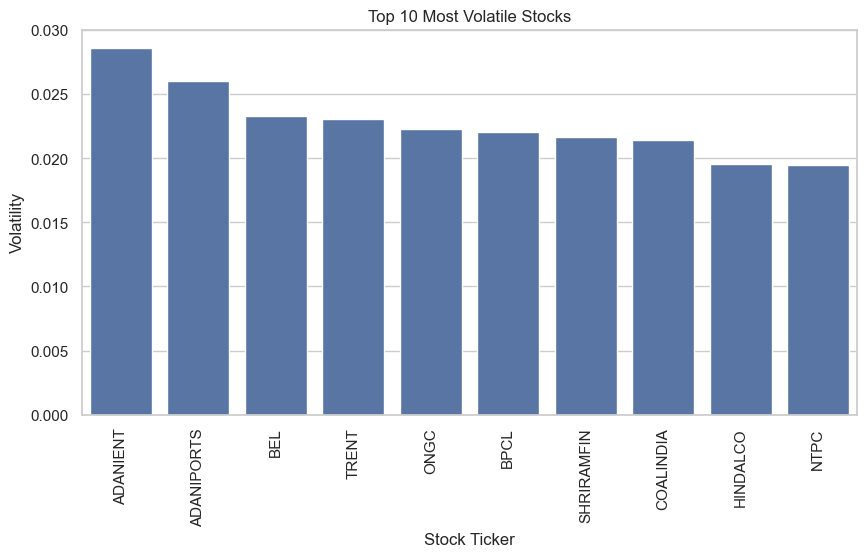

In [17]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_volatile, x="Ticker", y="Volatility")
plt.title("Top 10 Most Volatile Stocks")
plt.xlabel("Stock Ticker")
plt.ylabel("Volatility")
plt.xticks(rotation=90)
plt.show()

### 2) Cumulative Return Over Time:

In [21]:
# Calculate cumulative returns for each stock
df["cumulative_return"] = (1 + df["daily_return"]).groupby(df["Ticker"]).cumprod() - 1

# Get the final cumulative return for each stock at the end of the year
final_returns = df.groupby("Ticker")["cumulative_return"].last().reset_index()

# Select the top 5 performing stocks
top_5_stocks = final_returns.nlargest(5, "cumulative_return")["Ticker"]

# Filter the data for only the top 5 stocks
top_5_data = df[df["Ticker"].isin(top_5_stocks)]
top_5_data

,Ticker,close,date,high,low,open,volume,price,daily_return,cumulative_return
49,BAJAJ-AUTO,5016.45,2023-10-03,5073.0,4997.10,5065.00,464531,5035.050,NaN,NaN
99,BAJAJ-AUTO,4918.60,2023-10-04,5019.2,4903.05,5011.25,256544,4961.125,-0.019506,-0.019506
149,BAJAJ-AUTO,5011.05,2023-10-05,5039.3,4925.10,4935.00,657876,4982.200,0.018796,-0.001076
199,BAJAJ-AUTO,5014.60,2023-10-06,5120.0,4997.50,5120.00,279352,5058.750,0.000708,-0.000369
249,BAJAJ-AUTO,5007.30,2023-10-09,5068.7,4957.05,4957.05,244083,5012.875,-0.001456,-0.001824
...,...,...,...,...,...,...,...,...,...,...
13963,TRENT,6463.00,2024-11-14,6550.3,6367.05,6496.00,620489,6458.675,-0.005425,2.138750
14013,TRENT,6301.65,2024-11-18,6453.0,6275.00,6411.60,828906,6364.000,-0.024965,2.060390
14063,TRENT,6423.85,2024-11-19,6579.9,6359.80,6359.85,674042,6469.850,0.019392,2.119737
14113,TRENT,6460.45,2024-11-21,6519.0,6346.20,6400.00,1511541,6432.600,0.005698,2.137512


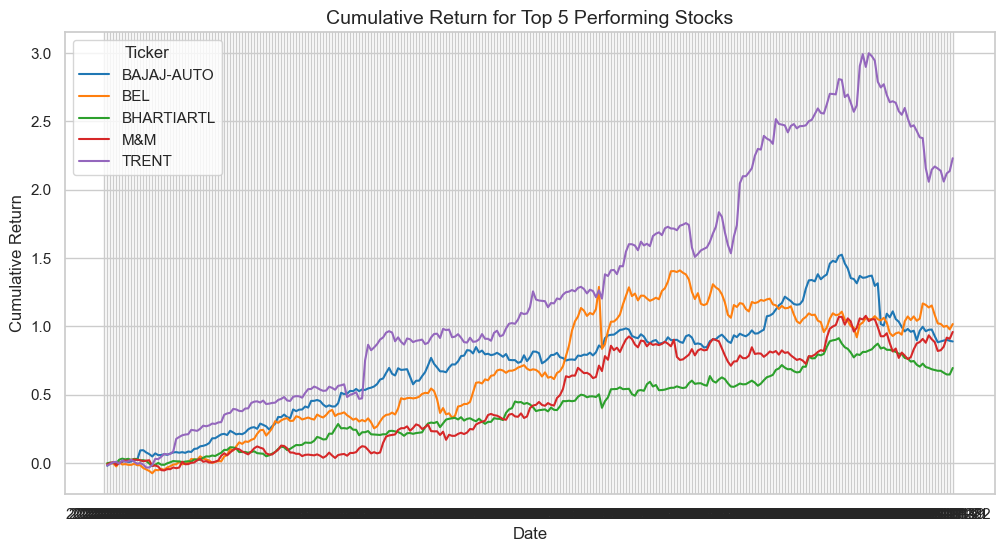

In [22]:
sns.set_theme(style="whitegrid")

# Create a Seaborn line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=top_5_data,
    x="date",
    y="cumulative_return",
    hue="Ticker",
    palette="tab10"
)

# Add title and labels
plt.title("Cumulative Return for Top 5 Performing Stocks", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Return", fontsize=12)
plt.legend(title="Ticker")
plt.show()


### 3) Sector-wise Performance

In [23]:
# Extracting the Sector-data csv file and creating the sec_df
sector_data = pd.read_csv(f"D:\\Kishanth\\Guvi Project\\Data-Driven Stock Analysis\\data\\Sector_data - Sheet1.csv")

# Splitting the column symbol and extract ticker
sector_data["Ticker"] = sector_data["Symbol"].str.split(": ").str[1]

# Taking Required columns
sector_data = sector_data[["Ticker","COMPANY","sector"]]

# Mering the df and sector_data based on ticker and using left join
sec_df = df.merge(sector_data, on="Ticker", how="left")

# joining the yearly_returns with df
sec_df = sec_df.merge(yearly_returns, on="Ticker",how="left")

# Grouping on sector and averaging the yearly return
sector_performance = sec_df.groupby("sector")["yearly_return"].mean().reset_index()
sector_performance

,sector,yearly_return
0,ALUMINIUM,34.982405
1,AUTOMOBILES,51.076017
2,BANKING,11.217651
3,CEMENT,37.233683
4,DEFENCE,103.662074
5,ENERGY,34.135962
6,ENGINEERING,18.516691
7,FINANCE,12.526050
8,FMCG,-1.797189
9,FOOD & TOBACCO,3.739883


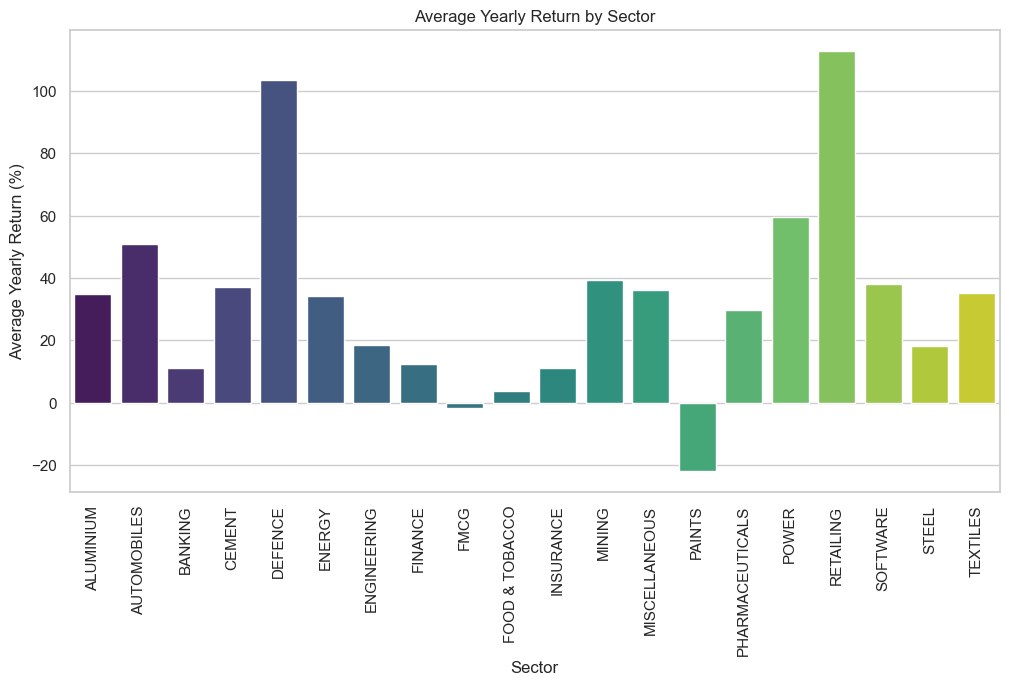

In [24]:
# visualization

plt.figure(figsize=(12, 6))
sns.barplot(data=sector_performance, x="sector", y="yearly_return", hue="sector", palette="viridis")
plt.title("Average Yearly Return by Sector")
plt.xlabel("Sector")
plt.ylabel("Average Yearly Return (%)")
plt.xticks(rotation=90)
plt.show()


### 4) Stock Price Correlation:

In [30]:
df

,Ticker,close,date,high,low,open,volume,price,daily_return,cumulative_return
24,ADANIENT,2387.25,2023-10-03,2424.90,2372.00,2418.00,2019899,2398.450,NaN,NaN
74,ADANIENT,2464.95,2023-10-04,2502.75,2392.25,2402.20,2857377,2447.500,0.032548,0.032548
124,ADANIENT,2466.35,2023-10-05,2486.50,2446.40,2477.95,1132455,2466.450,0.000568,0.033134
174,ADANIENT,2478.10,2023-10-06,2514.95,2466.05,2466.35,1510035,2490.500,0.004764,0.038056
224,ADANIENT,2442.60,2023-10-09,2459.70,2411.30,2440.00,1408224,2435.500,-0.014325,0.023186
...,...,...,...,...,...,...,...,...,...,...
13966,WIPRO,566.70,2024-11-14,574.55,564.20,568.95,4891760,569.375,-0.004042,0.397706
14016,WIPRO,552.85,2024-11-18,566.70,540.30,566.70,7644882,553.500,-0.024440,0.363547
14066,WIPRO,562.00,2024-11-19,569.80,554.70,556.00,6459889,562.250,0.016551,0.386114
14116,WIPRO,557.15,2024-11-21,567.60,555.30,562.00,5836304,561.450,-0.008630,0.374152


In [33]:
# Pivot the DataFrame so that each stock has its own column
price_matrix = df.pivot(index="date", columns="Ticker", values="close")
price_matrix
correlation_matrix = price_matrix.corr()
correlation_matrix.to_csv(f"D:\\Kishanth\\Guvi Project\\Data-Driven Stock Analysis\\data\\correlation_matrix.csv",index="Ticker")
correlation_matrix

Ticker,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BEL,BHARTIARTL,...,SUNPHARMA,TATACONSUM,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,TRENT,ULTRACEMCO,WIPRO
Ticker,,,,,,,,,,,,,,,,,,,,,
ADANIENT,1.000000,0.845806,0.594807,-0.186479,0.537048,0.634551,0.080113,-0.437309,0.597634,0.482298,...,0.555206,0.783299,0.783965,0.732033,0.601375,0.306188,0.457118,0.436790,0.590462,0.609774
ADANIPORTS,0.845806,1.000000,0.815085,-0.246520,0.770207,0.887718,0.215085,-0.486128,0.900377,0.819970,...,0.833258,0.823057,0.916523,0.834255,0.817482,0.659344,0.215162,0.779358,0.855521,0.798804
APOLLOHOSP,0.594807,0.815085,1.000000,-0.157872,0.607392,0.893753,0.509150,-0.410892,0.752139,0.865525,...,0.948026,0.668899,0.687952,0.520929,0.861910,0.849917,0.268920,0.877633,0.830027,0.906900
ASIANPAINT,-0.186479,-0.246520,-0.157872,1.000000,0.000971,-0.162563,0.463444,0.609427,-0.246263,-0.178033,...,-0.210304,-0.005593,-0.247491,-0.357433,-0.038384,-0.030905,0.370942,-0.093118,0.017379,-0.230921
AXISBANK,0.537048,0.770207,0.607392,0.000971,1.000000,0.742850,0.334558,-0.155250,0.863011,0.767627,...,0.620854,0.531076,0.596831,0.709668,0.596471,0.681483,0.002643,0.735466,0.867694,0.674543
BAJAJ-AUTO,0.634551,0.887718,0.893753,-0.162563,0.742850,1.000000,0.516365,-0.322937,0.872667,0.951010,...,0.945571,0.711380,0.786309,0.745496,0.822605,0.801832,0.199710,0.936383,0.860869,0.816423
BAJAJFINSV,0.080113,0.215085,0.509150,0.463444,0.334558,0.516365,1.000000,0.385476,0.248288,0.517993,...,0.518523,0.193070,0.088077,0.066394,0.416618,0.564844,0.357229,0.575921,0.448905,0.383862
BAJFINANCE,-0.437309,-0.486128,-0.410892,0.609427,-0.155250,-0.322937,0.385476,1.000000,-0.353268,-0.280086,...,-0.418315,-0.422037,-0.532980,-0.336865,-0.415928,-0.219030,0.038963,-0.267963,-0.261172,-0.434766
BEL,0.597634,0.900377,0.752139,-0.246263,0.863011,0.872667,0.248288,-0.353268,1.000000,0.904270,...,0.804530,0.603618,0.761131,0.811677,0.723381,0.777004,-0.093156,0.863242,0.894777,0.751017


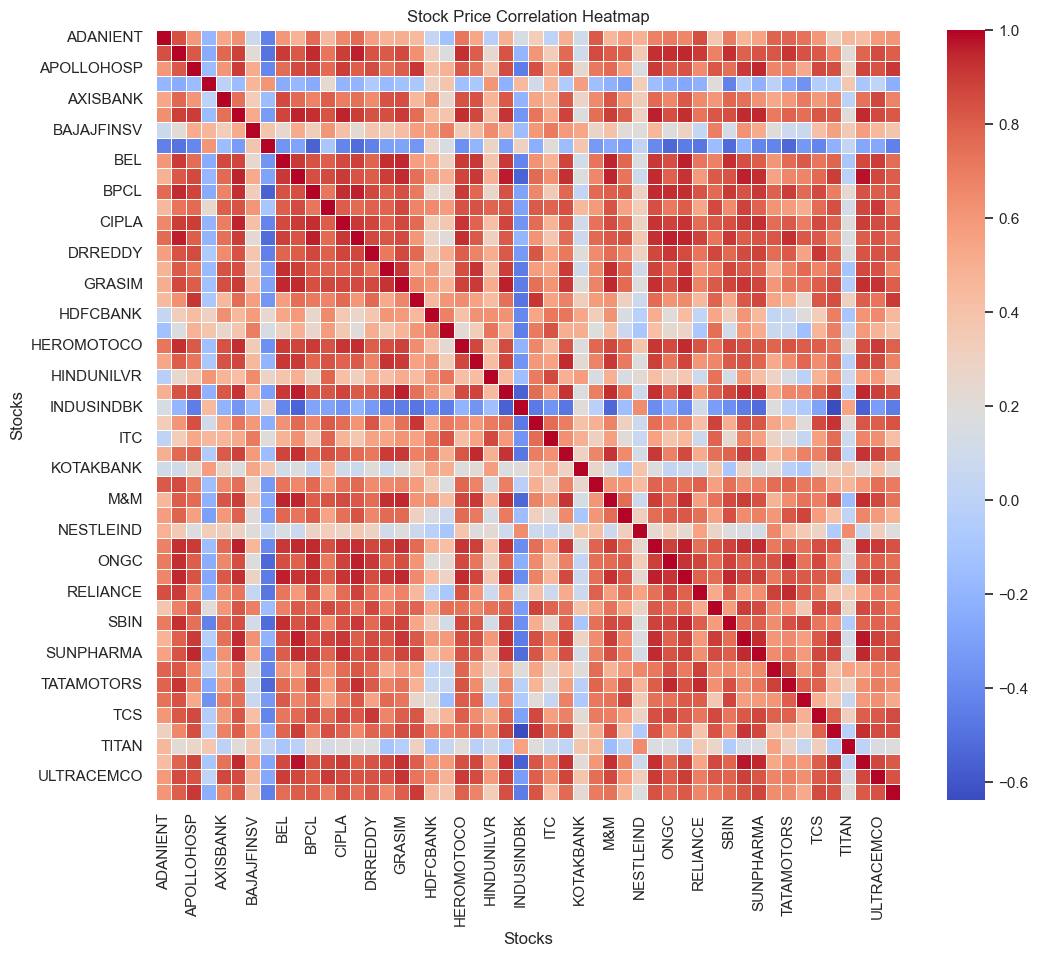

In [35]:
# Visualization

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Stock Price Correlation Heatmap")
plt.xlabel("Stocks")
plt.ylabel("Stocks")
plt.show()


### 5) Top 5 Gainers and Losers (Month-wise):

In [103]:
# Extract 'month' column if not already present
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')

# Calculate monthly return: (Last Close - First Close) / First Close
monthly_returns = df.groupby(['Ticker', 'month']).apply(
    lambda group: (group['close'].iloc[-1] - group['close'].iloc[0]) / group['close'].iloc[0]
).reset_index(name='monthly_return')

monthly_returns.sort_values(by=["Ticker","monthly_return"],ascending=False)

C:\Users\suren\AppData\Local\Temp\ipykernel_14884\3481763376.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_returns = df.groupby(['Ticker', 'month']).apply(


,Ticker,month,monthly_return
694,WIPRO,2024-06,0.159311
688,WIPRO,2023-12,0.156139
690,WIPRO,2024-02,0.100244
687,WIPRO,2023-11,0.084263
699,WIPRO,2024-11,0.036819
...,...,...,...
6,ADANIENT,2024-04,-0.060699
10,ADANIENT,2024-08,-0.061512
12,ADANIENT,2024-10,-0.074966
8,ADANIENT,2024-06,-0.128414


In [112]:
monthly_returns.to_csv(f"D:\\Kishanth\\Guvi Project\\Data-Driven Stock Analysis\\data\\monthly_returns.csv",index=False)

--------------------------------------------------------------------------------------------------------------

In [128]:
df["month"] = df["month"].astype(str)

--------------------------------------------------------------------------------------------------------------

# SQL Connection setup

### connection to the MySQL database

In [125]:
# Establishing a connection to the MySQL database
try:
    conn=mysql.connector.connect(
        host="localhost",      # Database host
        user="root",           # Database username
        password="Kichoo@25",  # Database password
        database="dummydb"     # Default database (optional here as the next command selects a specific one)
        )
    my_cursor = conn.cursor()

    print("Database Connection Established Successfully")

# Catch any errors during the database connection
except mysql.connector.Error as err:
    print(f"Error: {err}")

Database Connection Established Successfully


### Creating the Stock_analysis Table

In [126]:
# Accessing GUVI_PROJECT Database
my_cursor.execute("USE GUVI_PROJECT")
my_cursor.execute("Drop table if exists stock_analysis")

# Creating the Stock_analysis Table
my_cursor.execute('''create table if not exists stock_analysis(
	id int auto_increment primary key,
    Stock_name varchar(255) not null,
    Date date not null,
    open_price float not null,
    close_price float not null,
    high_price float not null,
    low_price float not null,
    volume bigint not null,
    price float not null,
    daily_return float null,
    cummulative_return float null,
    month char(7) not null
                );''')

print("Table Created successfully")

Table Created successfully


### Insert Data into the Table

In [127]:
my_cursor.execute("USE GUVI_PROJECT")
my_cursor.execute("Truncate table stock_analysis")

# --- Insert Data into the Table ---

# SQL query to insert data into the stock_analysis table
insert_query = '''INSERT INTO stock_analysis(
                    Stock_name,
                    Date,
                    open_price,
                    close_price,
                    high_price,
                    low_price,
                    volume,
                    price,
                    daily_return,
                    cummulative_return,
                    month)
                  VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''

# Removing the month column 
dummy_df = df[["Ticker","date","open","close","high","low","volume","price","daily_return","cummulative_return","month"]]

# Convert the DataFrame values into a list of lists for batch insertion
load_data = dummy_df.values.tolist()

# Execute the insertion query for all the rows in the DataFrame
my_cursor.executemany(insert_query,load_data)

# Commit the transaction to save the changes to the database
conn.commit()

print("Values are inserted successfully")

Values are inserted successfully


--------------------------------------------------------------------------------------------------------------